In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
pr_df=pd.read_csv('test.csv')
pr_df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown
1,2,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown
2,3,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown
3,4,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown
4,5,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
df.duplicated().sum()

0

In [7]:
# checking null values (NO null values are found)
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
#  here we can see the data is highly imbalanced 
df["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [9]:
cat_column=[i for i in df.columns if df.dtypes[i]=='O' ]
numeric_column=[i for i in df.columns if df.dtypes[i]!='O' ]
print('cat_column :',cat_column)
print('numeric_column :',numeric_column)

cat_column : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
numeric_column : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [10]:
# defining the function to get counts 
def get_counts(data):
    plt.figure(figsize = (15,5))
    plt.ylabel("Counts",fontsize = 10)
    return  data.value_counts().plot(kind = "bar",cmap='summer')
    plt.show()

<AxesSubplot:ylabel='Counts'>

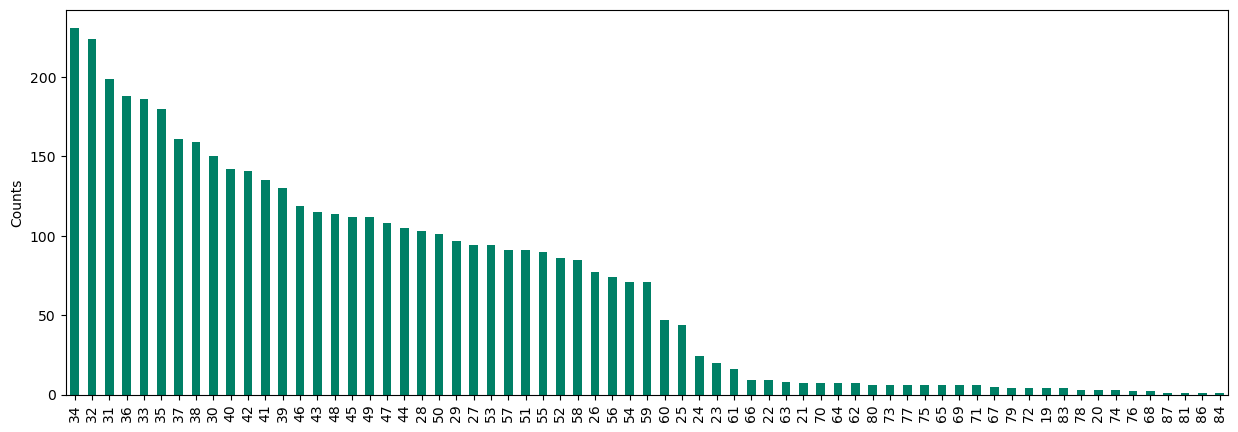

In [11]:
get_counts(df['age'])

Text(0.5, 0, 'Age')

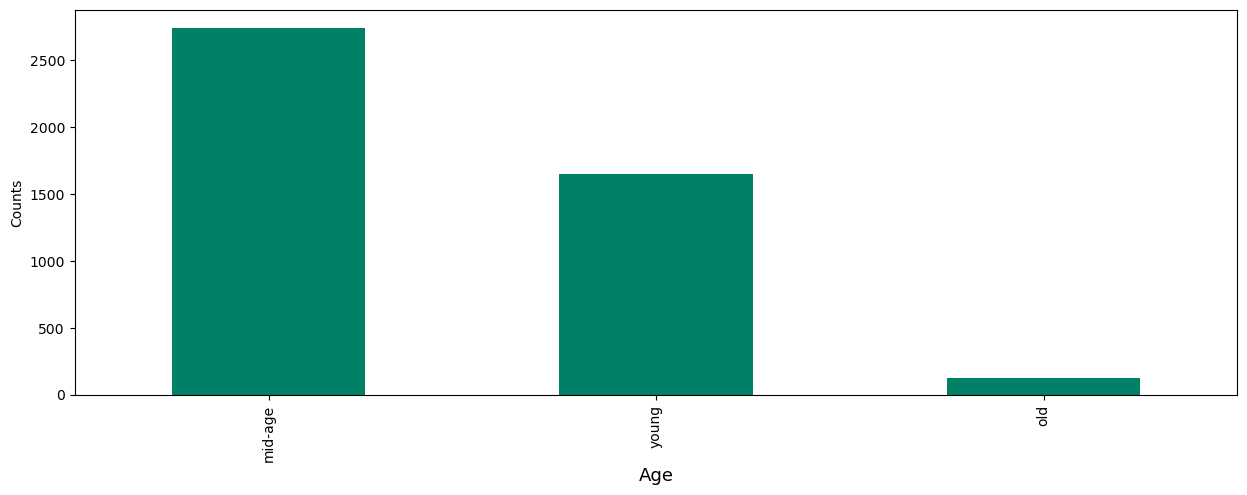

In [12]:
# getting information about counts of the population in each age category.
age = df["age"]
age= pd.cut(age,bins = [18,35,60,90],labels = ["young","mid-age","old"])
get_counts(age)
plt.xlabel("Age",fontsize = 13)

## Visualization of catogaries Variables

Text(0.5, 0, 'Job')

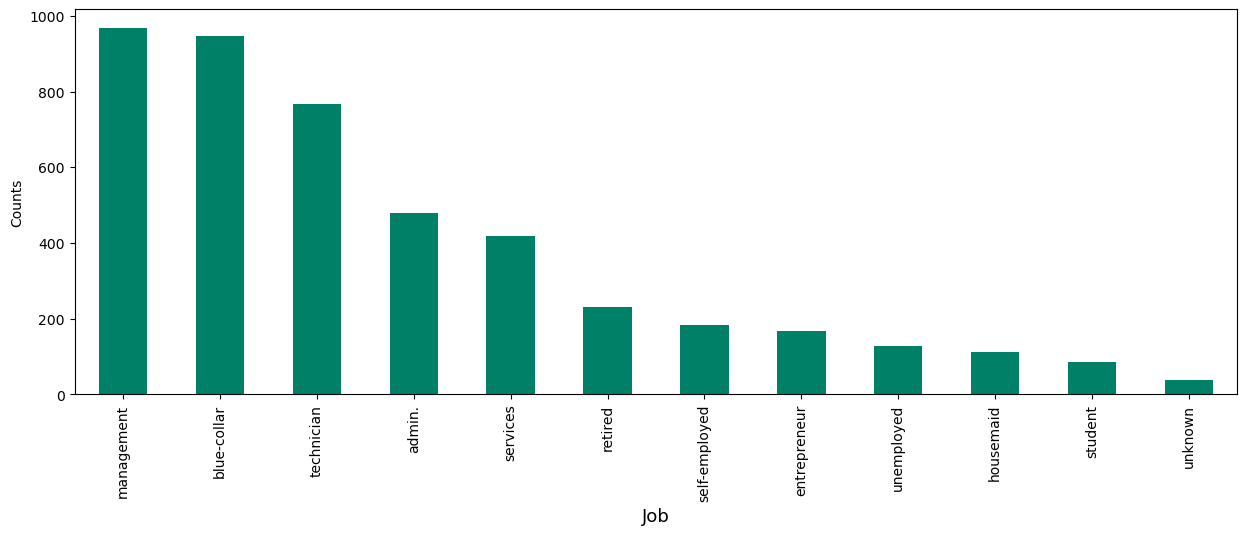

In [13]:
# getting information about counts of the population in each job category.
get_counts(df["job"])
plt.xlabel("Job",fontsize = 13)

Text(0.5, 0, 'Merital Status')

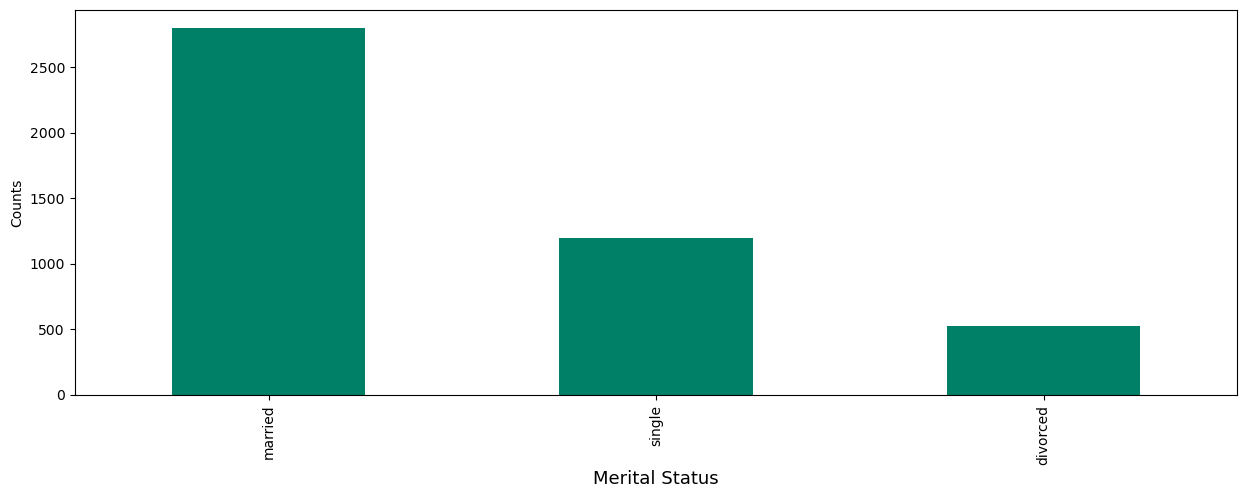

In [14]:
# getting information about counts of the population in each marital category.
get_counts(df["marital"])
plt.xlabel("Merital Status",fontsize = 13)

Text(0.5, 0, 'Education')

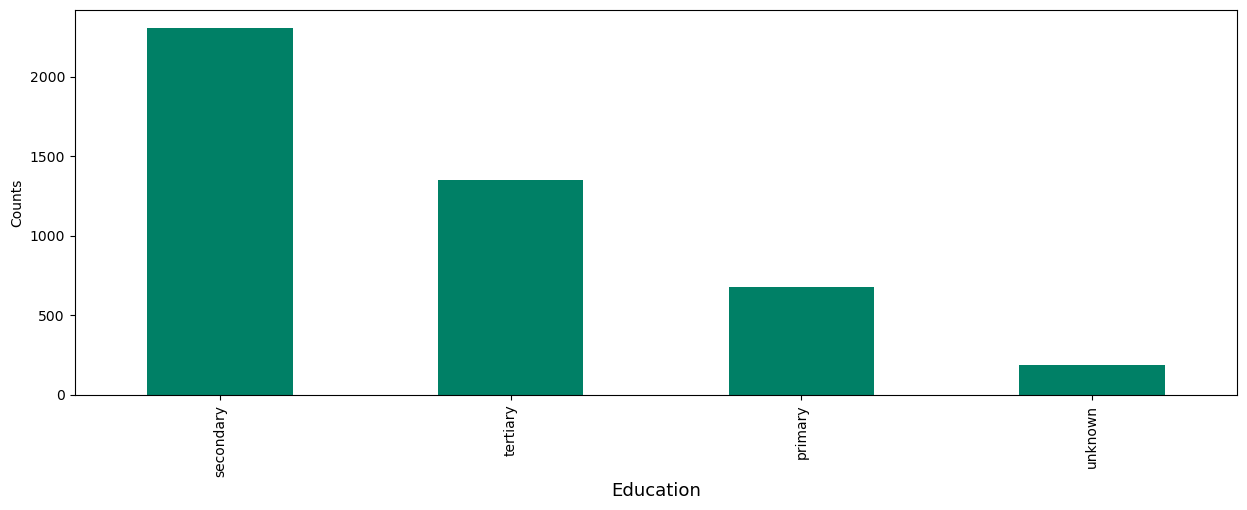

In [15]:
# getting information about counts of the population in each education category.
get_counts(df["education"])
plt.xlabel("Education",fontsize = 13)

Text(0.5, 0, 'Credit in default')

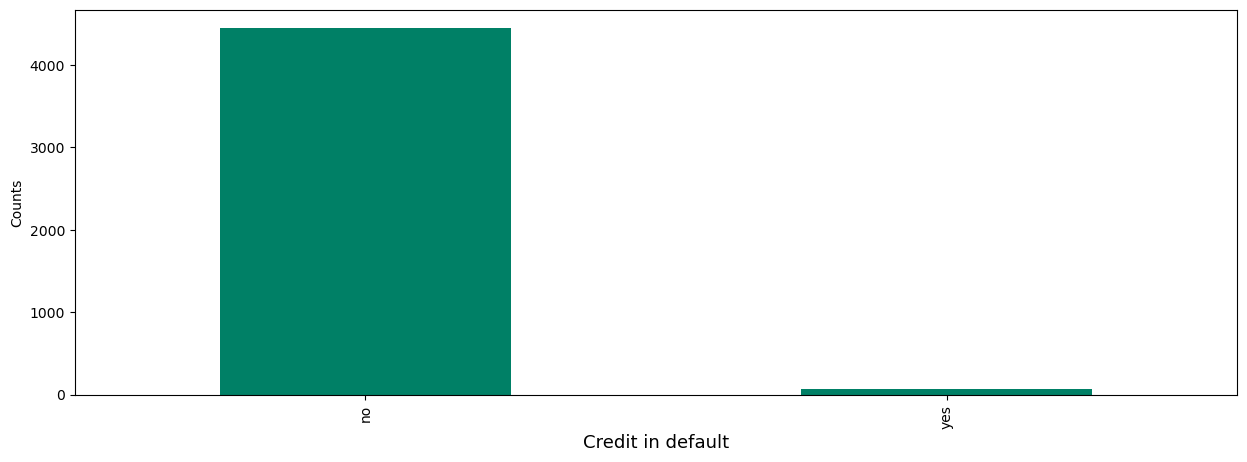

In [16]:
# getting information about counts of the population in each credit category.
get_counts(df["default"])
plt.xlabel("Credit in default",fontsize = 13)

Text(0.5, 0, 'Housing Loan')

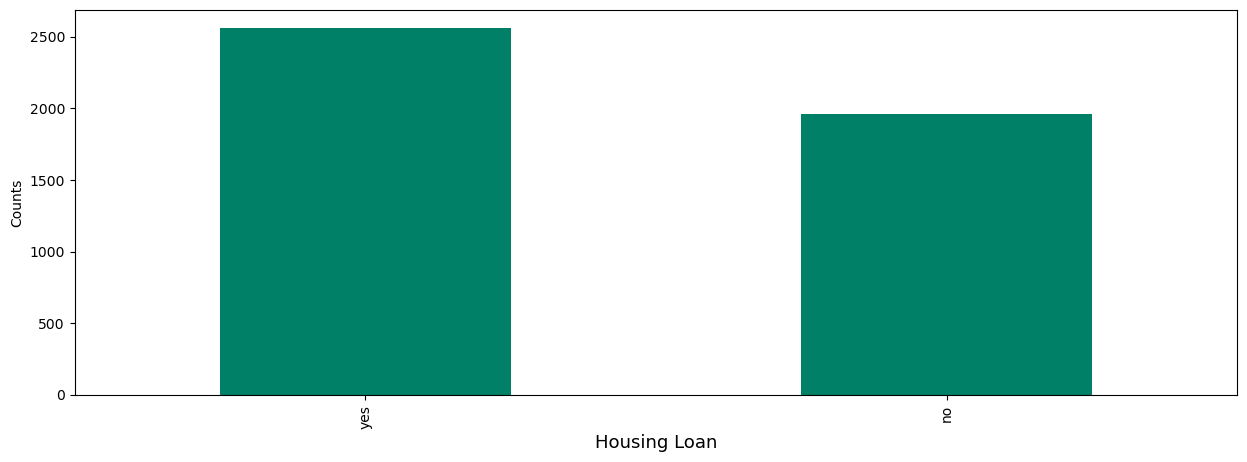

In [17]:
# getting information about counts of the population in each housing loan category.
get_counts(df["housing"])
plt.xlabel("Housing Loan",fontsize = 13)

Text(0.5, 0, 'Personal Loan')

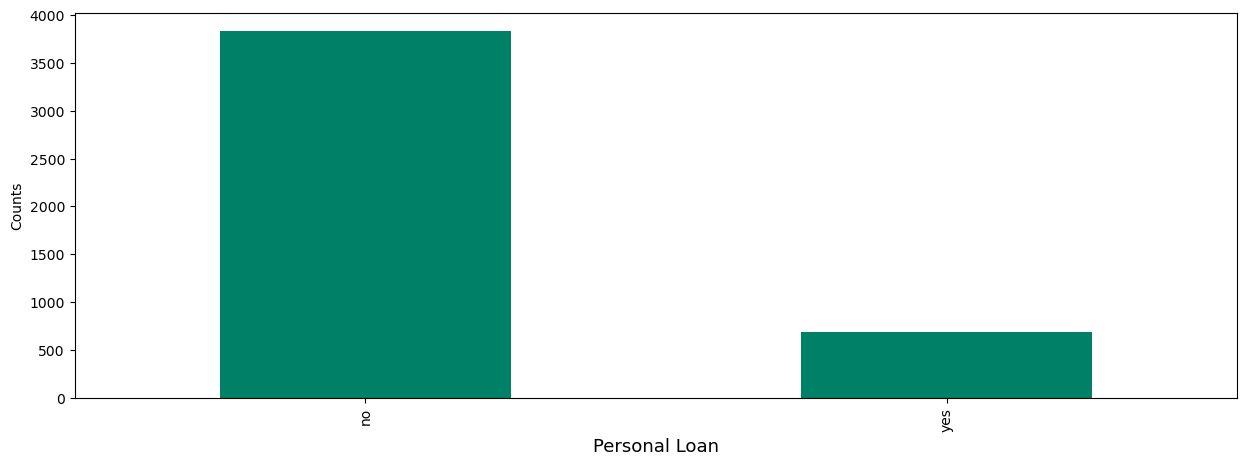

In [18]:
# getting information about counts of the population in each personal loan category.
get_counts(df["loan"])
plt.xlabel("Personal Loan",fontsize = 13)

Text(0.5, 0, 'contact communication type')

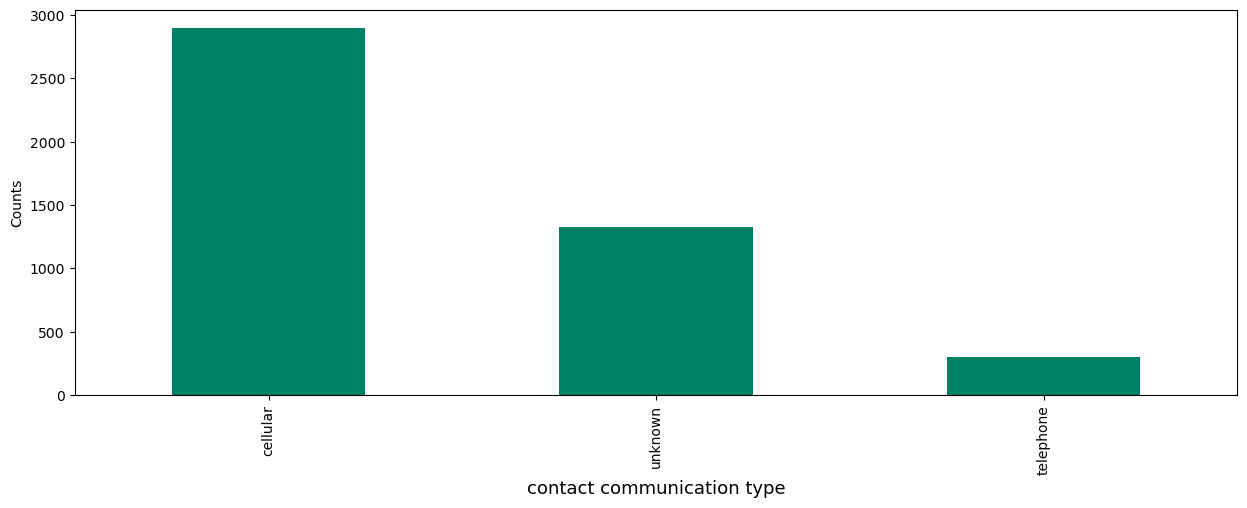

In [19]:
# getting information about counts of the population in each contact communication category.
get_counts(df["contact"])
plt.xlabel("contact communication type",fontsize = 13)

Text(0.5, 0, 'last contact month of year')

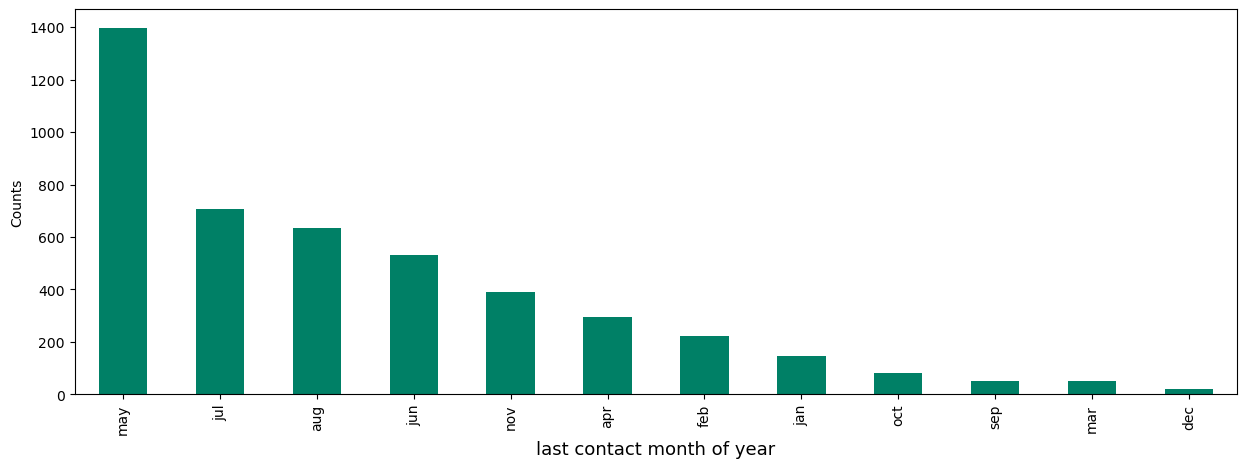

In [20]:
# getting information about counts of the population in each contact last month of year category.
get_counts(df["month"])
plt.xlabel("last contact month of year",fontsize = 13)

Text(0.5, 0, 'Outcome of the previous marketing campaign')

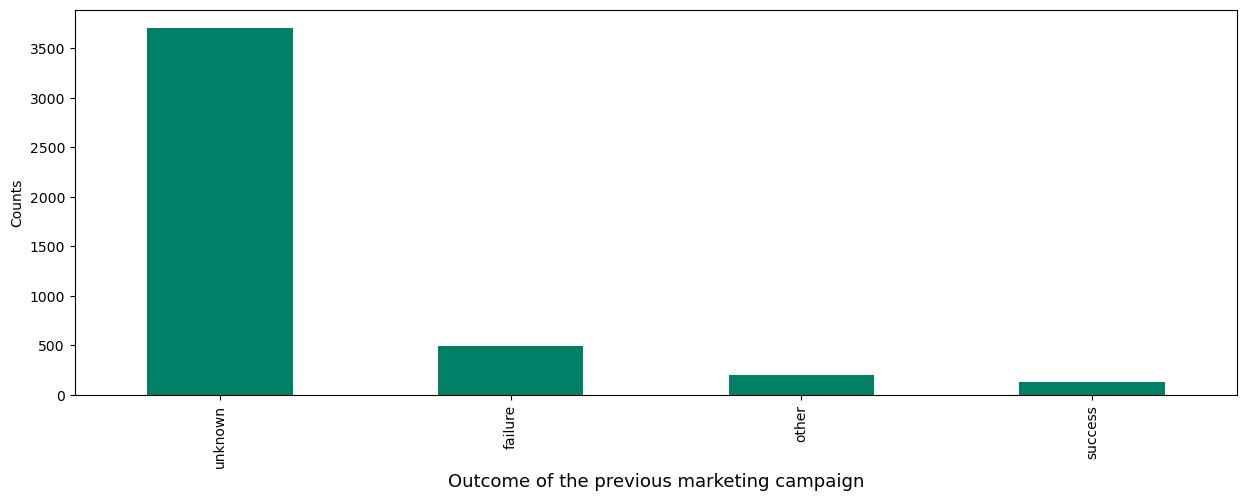

In [21]:
# getting information about counts of the population in each Outcome category.
get_counts(df["poutcome"])
plt.xlabel("Outcome of the previous marketing campaign",fontsize = 13)

## *Visualization of Numeric Variables*

In [22]:
# defining a function to get distribution and outliers
def get_distribution(data):
    fig, axes = plt.subplots(1, 2, figsize=(16,4))
    sns.distplot(data, hist = False,ax = axes[0],color="r")
    sns.boxplot(data,ax = axes[1],color="g")
    return plt.show()

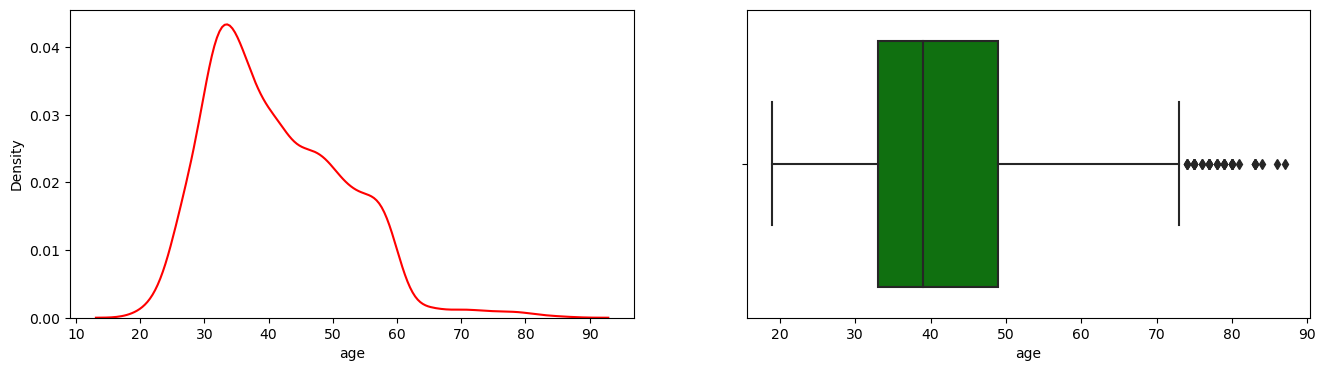

In [23]:
# getting information regarding distribution and outliers of age feature.
get_distribution(df["age"])

In [24]:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

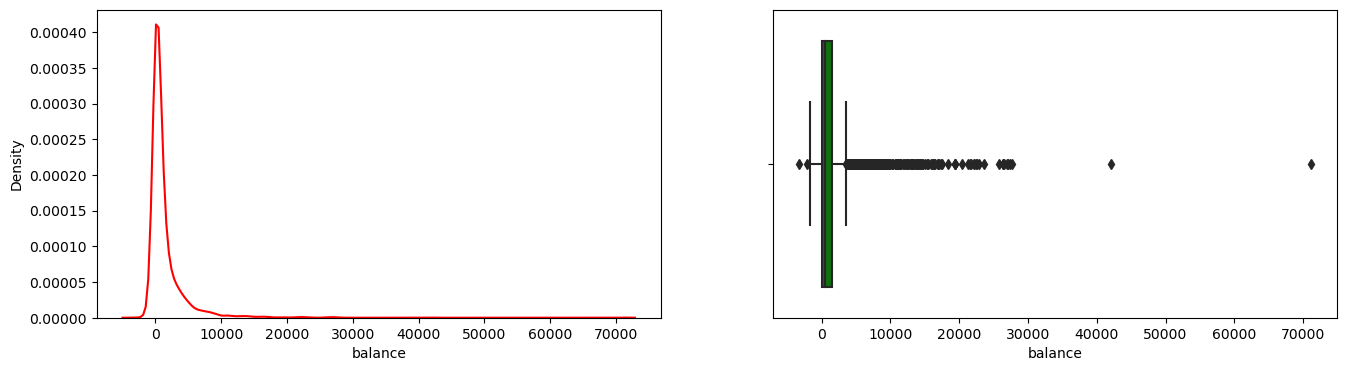

In [25]:
# getting information regarding distribution and outliers of balance feature.
get_distribution(df["balance"])

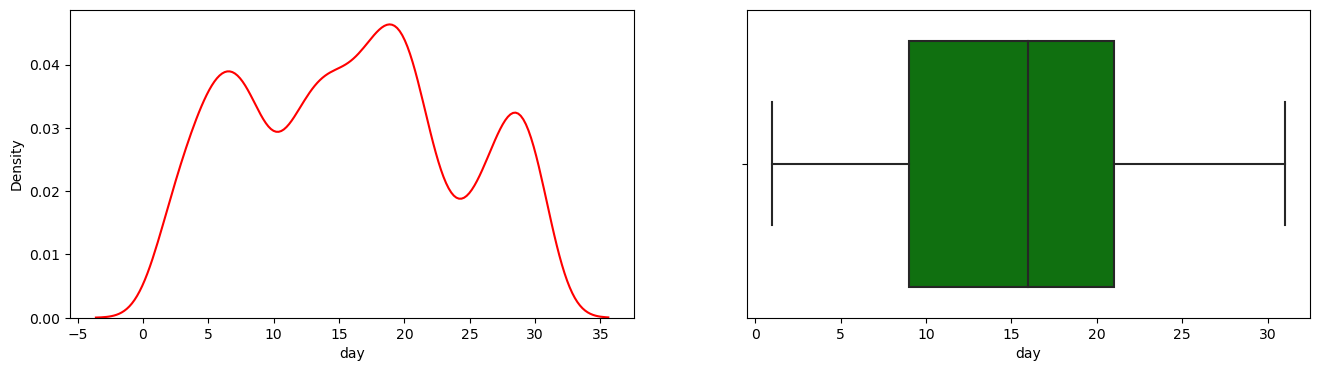

In [26]:
# getting information regarding distribution and outliers of day feature.
get_distribution(df["day"])

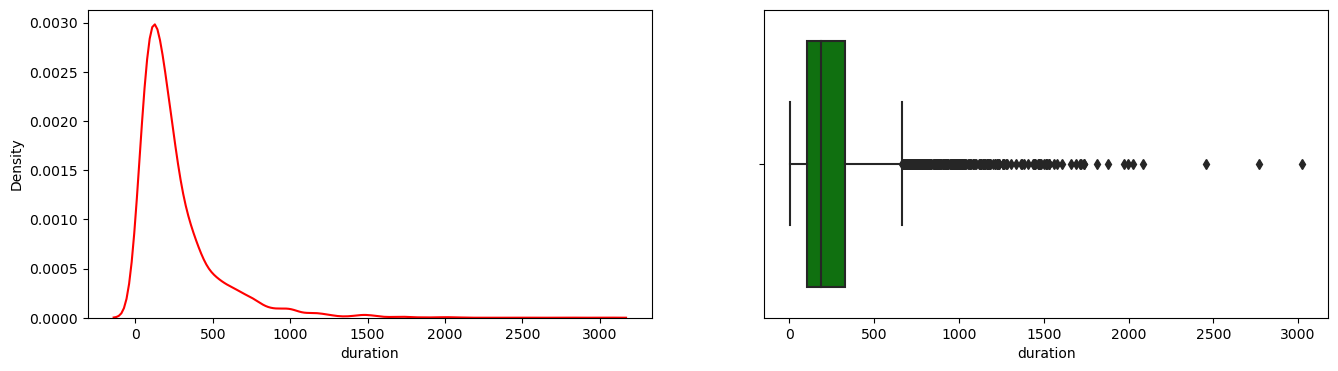

In [27]:
# getting information regarding distribution and outliers of duration feature.
get_distribution(df["duration"])

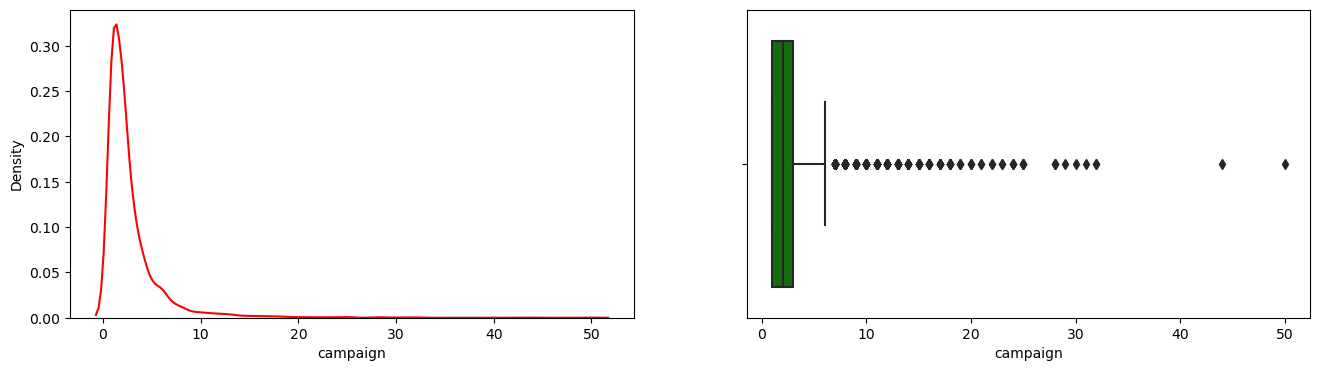

In [28]:
# getting information regarding distribution and outliers of campaign feature.
get_distribution(df["campaign"])

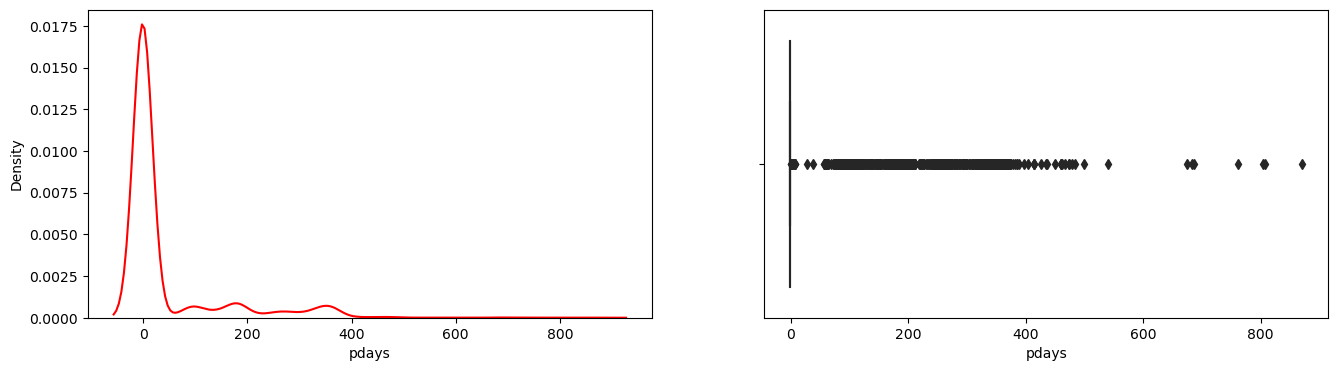

In [29]:
# getting information regarding distribution and outliers of pdays feature.
get_distribution(df["pdays"])

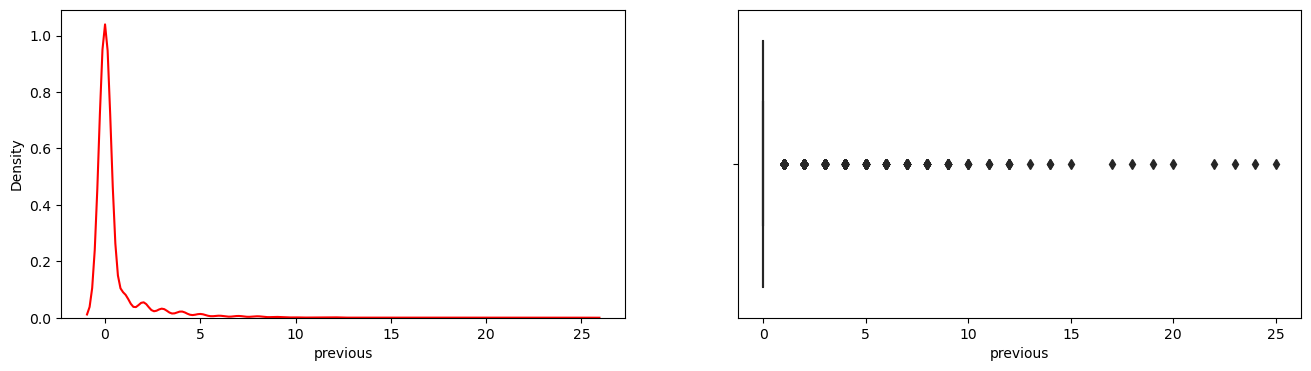

In [30]:
# getting information regarding distribution and outliers of previous feature.
get_distribution(df["previous"])

***Bi & Multi-variate Analysis of the data:***

In [31]:
df.groupby("y").mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


y
no     40.998000
yes    42.491363
Name: age, dtype: float64


<AxesSubplot:xlabel='y'>

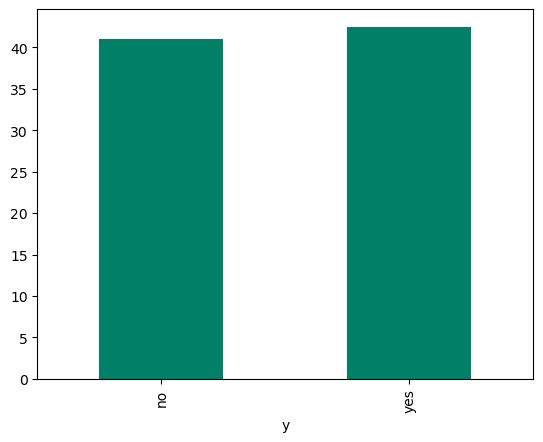

In [32]:
a = df.groupby("y").mean()["age"]
print(a)
a.plot(kind = "bar", cmap = "summer")

*The average age in each category of target variable is (Yes: 42 years and NO: 40 years)*

job
admin.           39.682008
blue-collar      40.156448
entrepreneur     42.011905
housemaid        47.339286
management       40.540764
retired          61.869565
self-employed    41.453552
services         38.570743
student          26.821429
technician       39.470052
unemployed       40.906250
unknown          48.105263
Name: age, dtype: float64


<AxesSubplot:xlabel='job'>

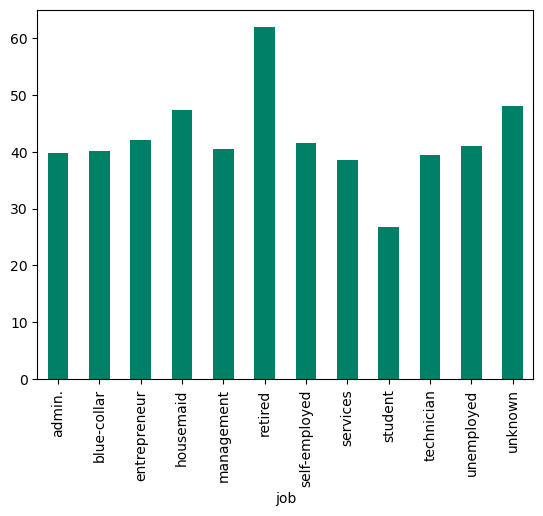

In [33]:
a = df.groupby("job").mean()["age"]
print(a)
a.plot(kind = "bar", cmap = "summer")

*The average age in each category of job   *

In [34]:
a=df.pivot_table(values='age',index='job',columns='y',aggfunc='mean',)
a

y,no,yes
job,,
admin.,39.471429,41.206897
blue-collar,40.273660,38.666667
entrepreneur,41.993464,42.200000
housemaid,47.571429,45.714286
management,40.763723,39.114504
retired,60.215909,67.259259
self-employed,40.950920,45.550000
services,38.641161,37.868421
student,27.584615,24.210526


*The average age in each category of job for target yes and no.*

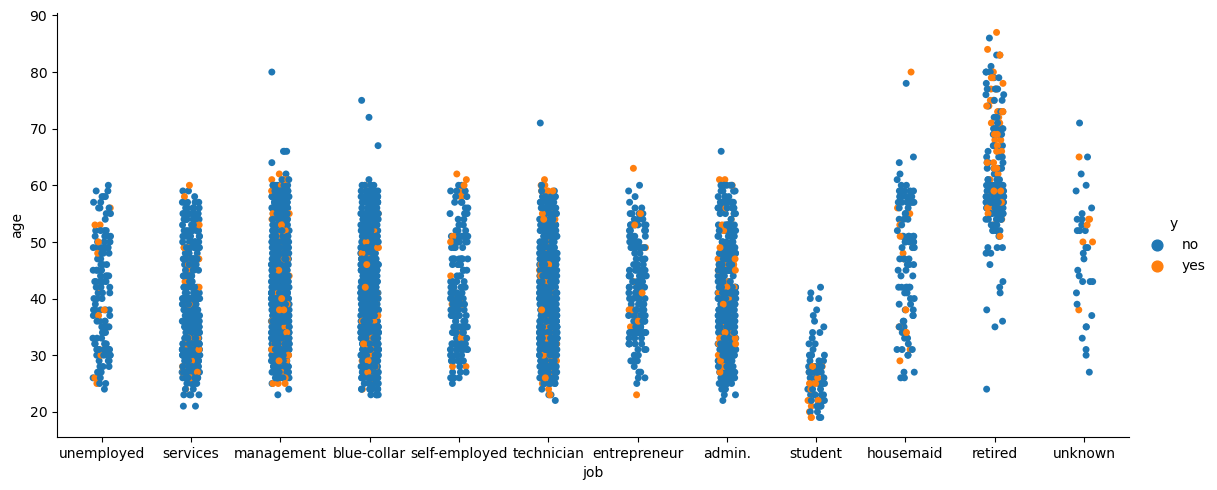

In [35]:
#Distribution of ages for all categories of job in both of targeted categories.
sns.catplot(x='job',y='age',hue='y',data=df,jitter = 0.1, aspect = 2.3,height = 5)

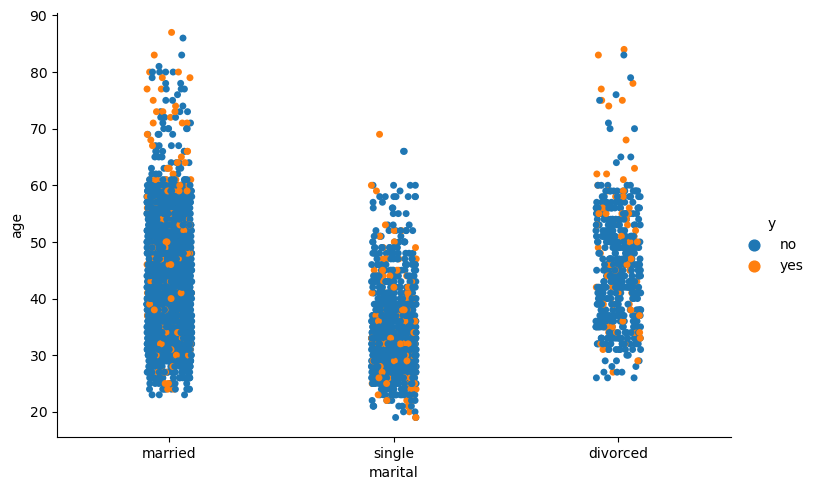

In [36]:
#distribution of ages in each category of marital status in both of targeted categories.
sns.catplot(data = df, x = "marital", y = "age", 
            hue = "y", jitter = 0.1, aspect = 1.5,height = 5)

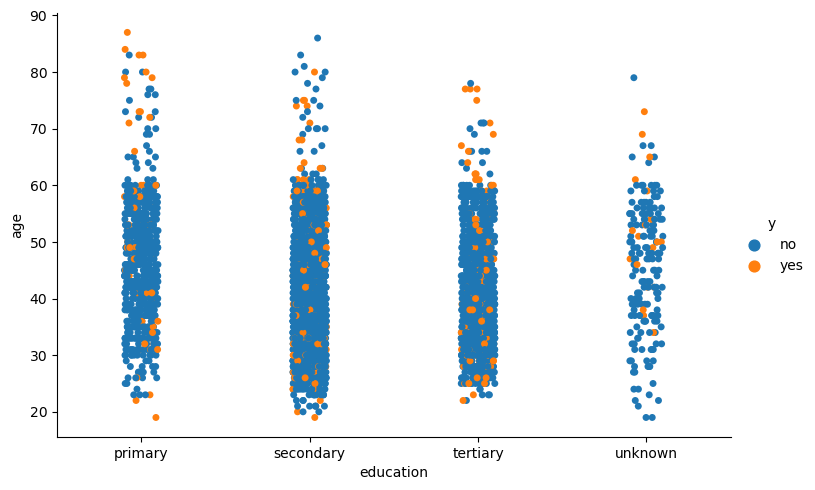

In [37]:
#distribution of ages in each category of education in both of targeted categories.
sns.catplot(data = df, x = "education", y = "age", 
            hue = "y", jitter = 0.1, aspect = 1.5,height = 5)

In [38]:
df.groupby('loan').mean()['age']

loan
no     41.220627
yes    40.890014
Name: age, dtype: float64

In [39]:
# The average age where housing loan and personal loans are no & no / no & yes / yes & no / Yes & Yes respectively.
df.groupby(["housing","loan"],as_index=False)["age"].mean()

,housing,loan,age
0,no,no,43.470483
1,no,yes,43.754386
2,yes,no,39.468184
3,yes,yes,38.879310


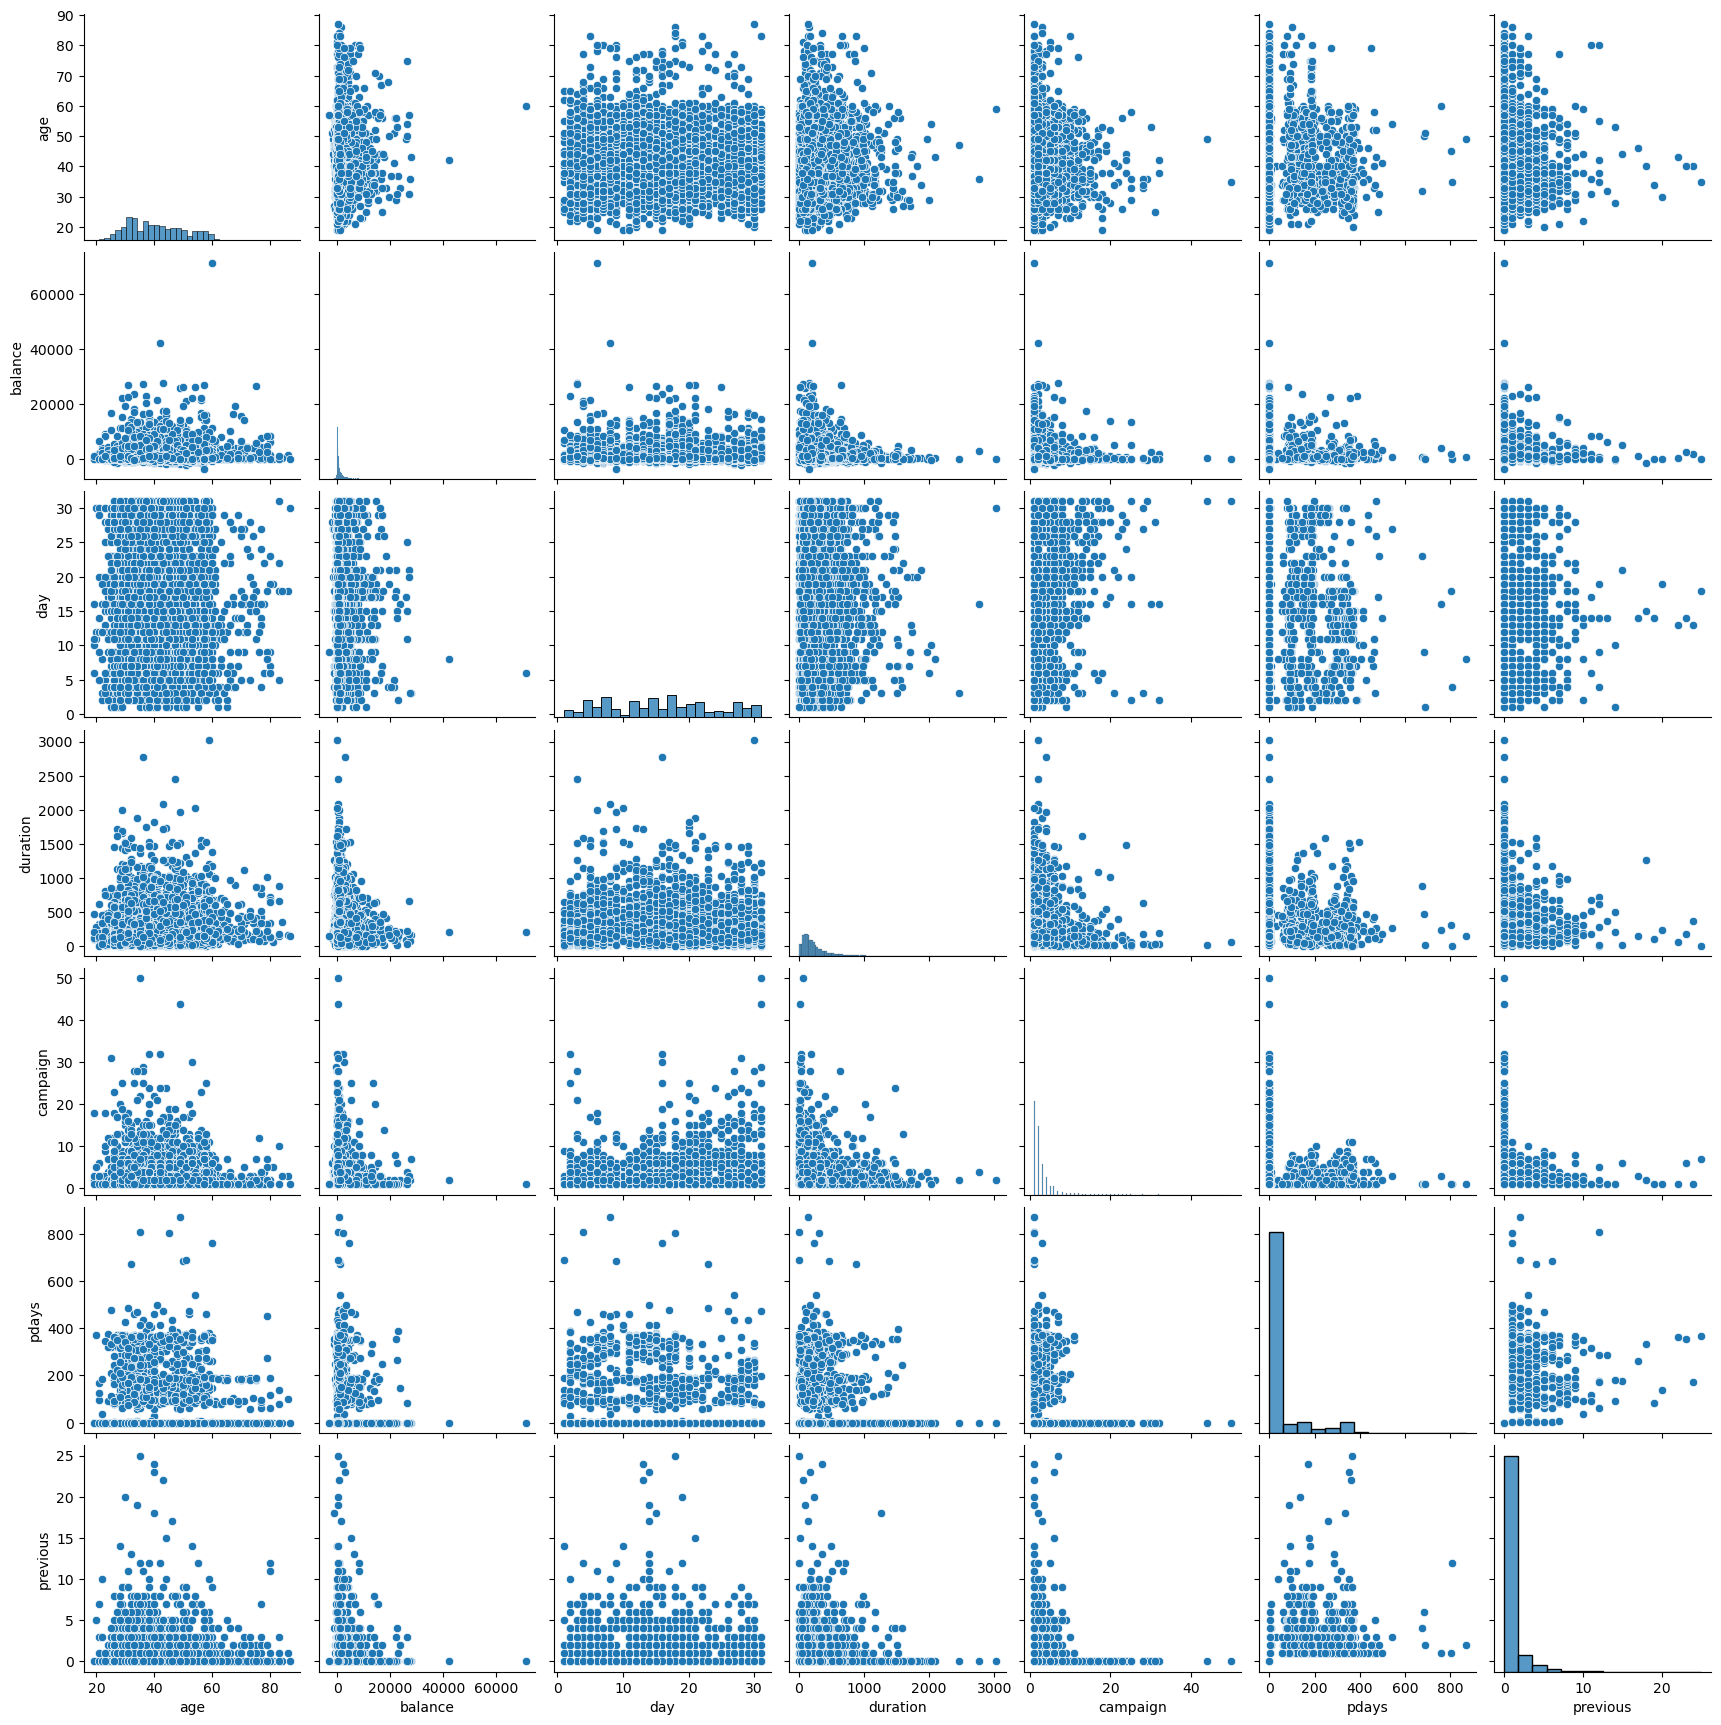

In [40]:
# Getting distribution of data points (checking featuers are related to each other or not)
sns.pairplot(data = df.drop("y",axis = 1))

In [41]:
df[["day", "month","pdays"]].head(5)

,day,month,pdays
0,19,oct,-1
1,11,may,339
2,16,apr,330
3,3,jun,-1
4,5,may,-1


As we can see the previous days has include all the information regarding when the last contact was done. So we do not need rest of two columns (**day & month**)

<AxesSubplot:xlabel='marital,y'>

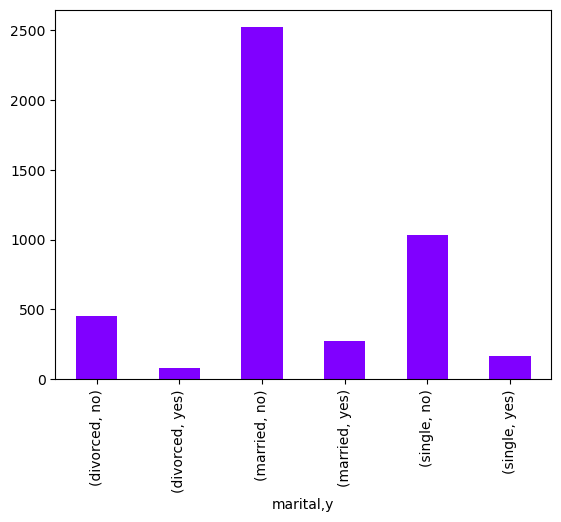

In [42]:
# getting count of categories of marital featuers with categoreis of target features
df.groupby(['marital','y']).count()['age'].plot(kind='bar',cmap='rainbow')

## *Feature Engineering*

In [43]:
# making a copy of data frame
df1 = df.copy()

In [44]:
# as we have seen that days and months features has same information like pdays. So I decided to drop them
df1.drop(["day","month"],axis =1, inplace = True)

In [45]:
# changing unknown with null values (because "unknown" has no information)
for i in df1.columns:
    df1[i] = np.where(df1[i] == "unknown", np.nan, df1[i])
df1.isna().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [46]:
#The percentage of null values in poutcome feature
(3705/df1.poutcome.shape[0])*100

81.95089581950896

In [47]:
#The percentage of null values in contact feature but we can impute the null values of it
(1324/df1.contact.shape[0])*100

29.285556292855563

**As we can see the poutcome has 3705 values null after replacing the unknown with null values. And we will not impute them because the percentage of null values is higher. So, i decided to drop this feature**

In [48]:
# dropping the feature with higher percentage of null values
df1.drop("poutcome", inplace = True, axis = 1)

In [49]:
# We have contact feature with high null values 
# Also, there is no effect either they called by cellular or landline. So, i decided to drop it 
df1.drop("contact", inplace = True, axis = 1)

In [50]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,79.0,1.0,-1.0,0.0,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,220.0,1.0,339.0,4.0,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,185.0,1.0,330.0,1.0,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,199.0,4.0,-1.0,0.0,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,226.0,1.0,-1.0,0.0,no


In [51]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [52]:
# using forward fill method to fill the nan values
df1["job"].fillna(method = "ffill",inplace=True)
df1["education"].fillna(method = "ffill",inplace= True)

In [53]:
df1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [54]:
# in place of label encoder i am using replace function for ordinal data in independent features
df1["education"].replace({'primary':0, 'secondary':1, 'tertiary':2},inplace = True)
df1["default"].replace({'no':0, 'yes':1},inplace = True)
df1["marital"].replace({'single':0, 'married':1, 'divorced':2},inplace = True)
df1["housing"].replace({'no':0, 'yes':1},inplace = True)
df1["loan"].replace({'no':0, 'yes':1},inplace = True)

In [55]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30.0,unemployed,1,0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,no
1,33.0,services,1,1,0,4789.0,1,1,220.0,1.0,339.0,4.0,no
2,35.0,management,0,2,0,1350.0,1,0,185.0,1.0,330.0,1.0,no
3,30.0,management,1,2,0,1476.0,1,1,199.0,4.0,-1.0,0.0,no
4,59.0,blue-collar,1,1,0,0.0,1,0,226.0,1.0,-1.0,0.0,no


In [56]:
#Dummy variable
df1=pd.get_dummies(data=df1,columns=['job'],drop_first=True)

In [57]:
df1.head()

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,30.0,1,0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,1
1,33.0,1,1,0,4789.0,1,1,220.0,1.0,339.0,4.0,no,0,0,0,0,0,0,1,0,0,0
2,35.0,0,2,0,1350.0,1,0,185.0,1.0,330.0,1.0,no,0,0,0,1,0,0,0,0,0,0
3,30.0,1,2,0,1476.0,1,1,199.0,4.0,-1.0,0.0,no,0,0,0,1,0,0,0,0,0,0
4,59.0,1,1,0,0.0,1,0,226.0,1.0,-1.0,0.0,no,1,0,0,0,0,0,0,0,0,0


In [58]:
df1.shape

(4521, 22)

In [59]:
x=df1.drop(columns=['y'])
y=df1[['y']]


In [60]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [61]:
# First we have to balance the data for training (I am using OverSampler)
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_over, y_over = over.fit_resample(x,y)

In [62]:
print(x_over.shape)
print(y_over.shape)

(8000, 21)
(8000, 1)


# *Feature Selection*

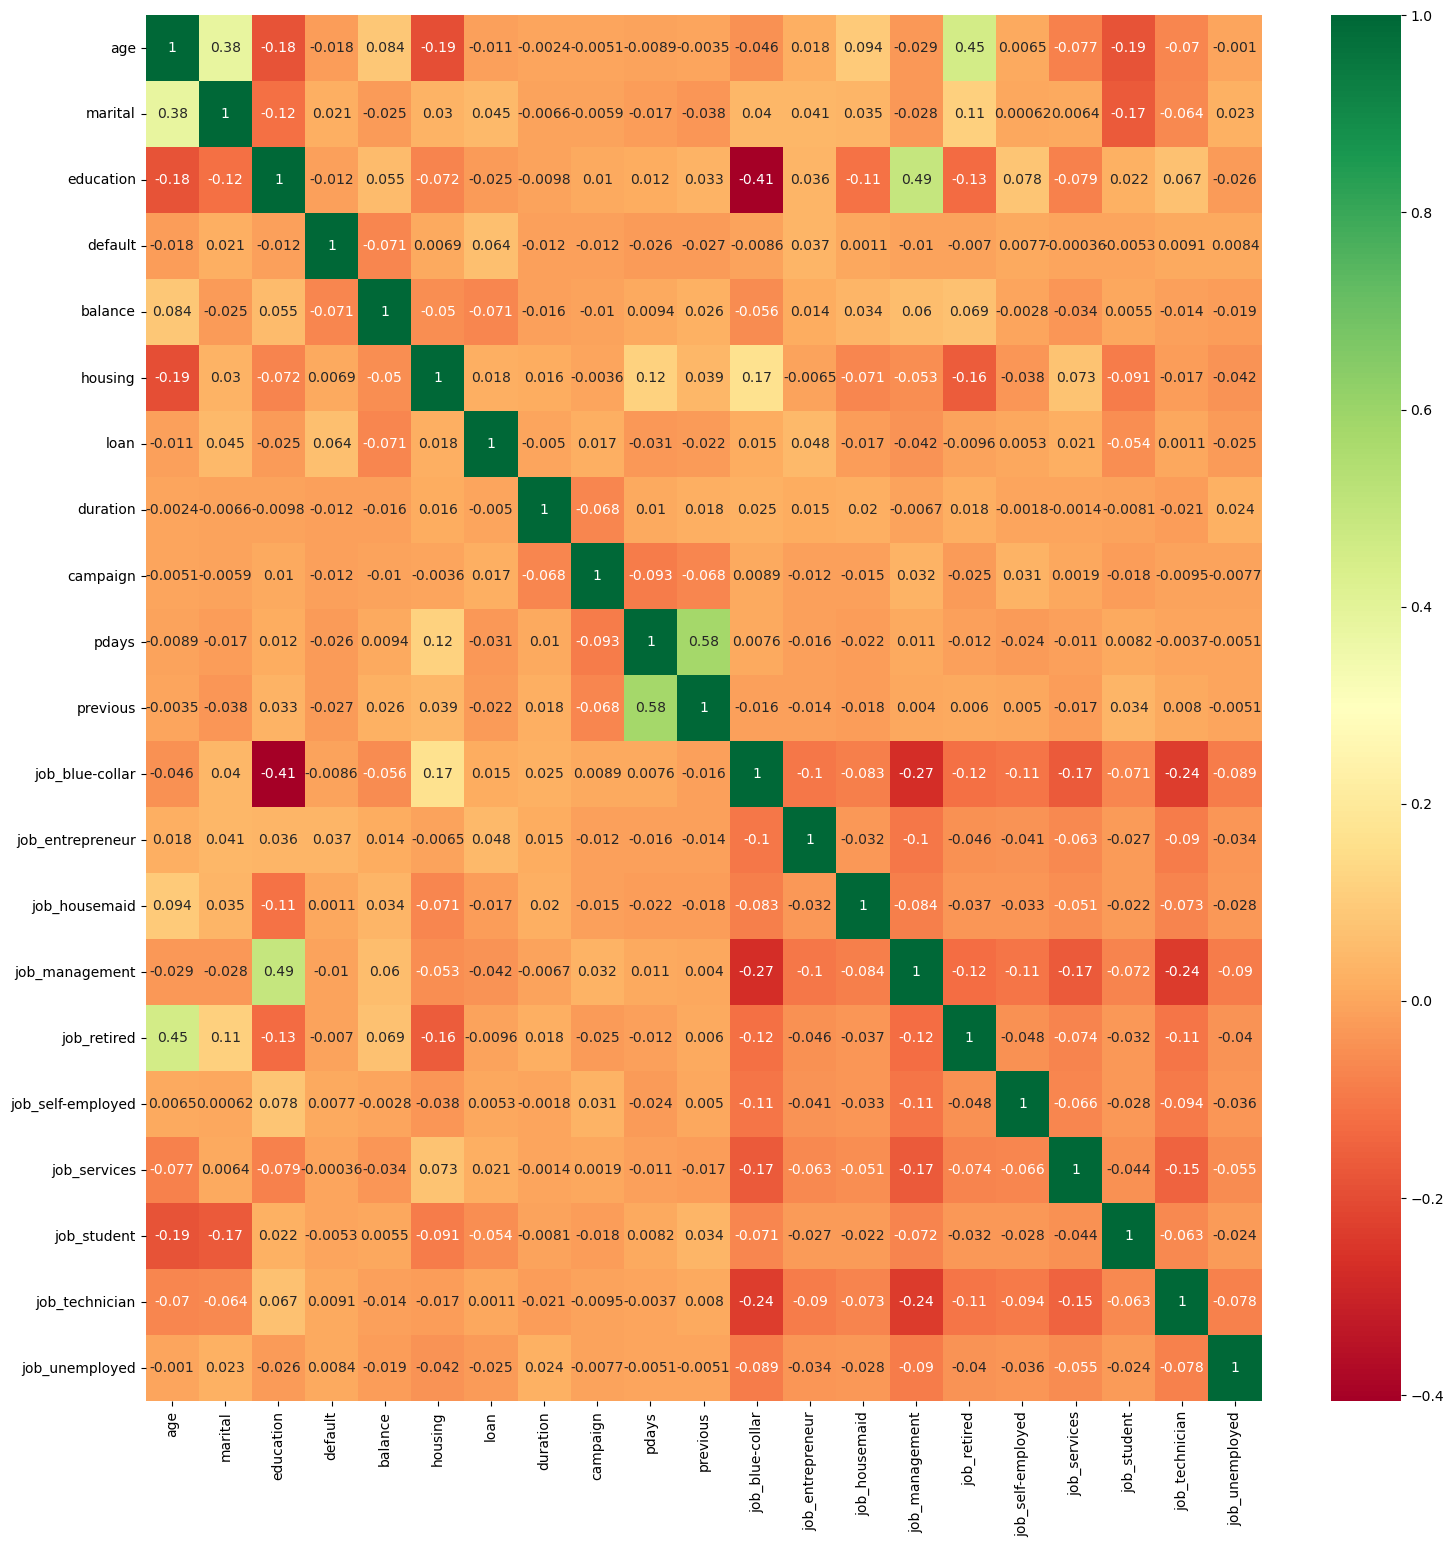

In [63]:
plt.figure(figsize=(18,18))
sns.heatmap(df1.corr(),annot=True, cmap='RdYlGn')

plt.show()

In [64]:
#replacing target variable to 0 & 1
y_over=y_over.replace({'no':0, 'yes':1,})     

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x_over, y_over)

ExtraTreesRegressor()

In [70]:
print(selection.feature_importances_)

[0.09597161 0.04457589 0.03790788 0.00386096 0.08659023 0.02856676
 0.02431103 0.38836822 0.06525508 0.05967482 0.0408717  0.02053116
 0.00978527 0.00642424 0.01967759 0.0111465  0.00873545 0.01285687
 0.0078666  0.01929986 0.00772228]


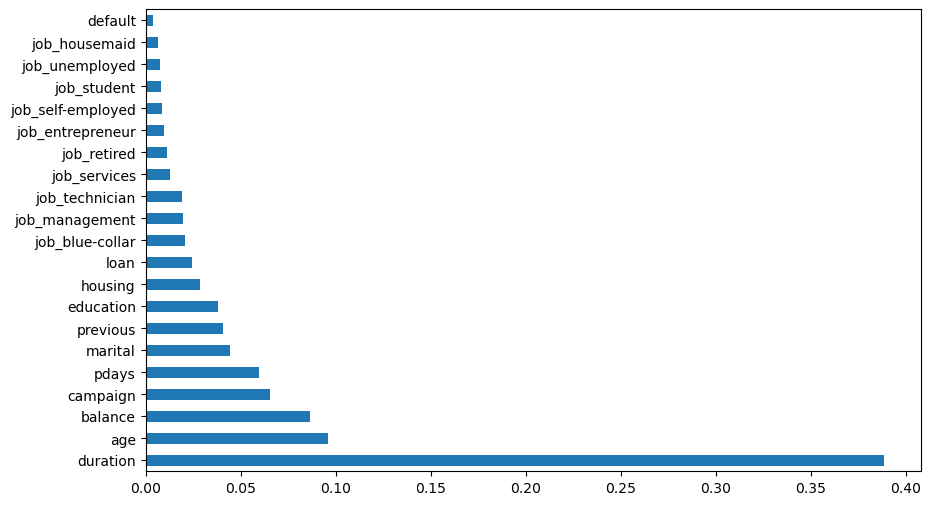

In [71]:
plt.figure(figsize = (10,6))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

# *Model Selection*

In [72]:
# spliting the data for training as well as testing purposes.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_over,y_over, test_size=0.2, random_state=101)

#### *Selecting the model*

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve,classification_report,roc_curve, confusion_matrix

In [74]:
lst = [("LogisticRegression",LogisticRegression()),
       ("KNN Classifier", KNeighborsClassifier()),
       ("RandomForest",RandomForestClassifier()),
      ("AdaBoost",AdaBoostClassifier()),
      ("XGBoost",XGBClassifier())]
for name,model in lst:
    model.fit(x_train, y_train)
    y1 = model.predict(x_train)
    accuracy = accuracy_score(y_train,y1)
    y2 = model.predict(x_test)
    acc_te = accuracy_score(y_test,y2)
    print(f"For {name}::\nThe Training Accuracy is: {accuracy}\nThe Testing Accuracy is: {acc_te}")
    print("--"*40)

For LogisticRegression::
The Training Accuracy is: 0.78703125
The Testing Accuracy is: 0.78875
--------------------------------------------------------------------------------
For KNN Classifier::
The Training Accuracy is: 0.91109375
The Testing Accuracy is: 0.884375
--------------------------------------------------------------------------------
For RandomForest::
The Training Accuracy is: 1.0
The Testing Accuracy is: 0.9675
--------------------------------------------------------------------------------
For AdaBoost::
The Training Accuracy is: 0.814375
The Testing Accuracy is: 0.815
--------------------------------------------------------------------------------
For XGBoost::
The Training Accuracy is: 0.9953125
The Testing Accuracy is: 0.953125
--------------------------------------------------------------------------------


### *As we can see that, we are getting good accuracy in xgboost model. So, we will move forward with xgbclassifier model.*


### *Tuning The Model*

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
estimator = XGBClassifier()
parameters = {"n_estimators": [50,100,150,200,250,300,350,400],
             "max_depth": np.arange(2,10),
             "learning_rate": np.arange(0.01,0.1,0.02),
             'subsample': np.arange(0.5, 1.0, 0.1),
             'colsample_bytree': np.arange(0.4, 1.0, 0.1),
             'colsample_bylevel': np.arange(0.4, 1.0, 0.1)}
rscv = RandomizedSearchCV(estimator, parameters, cv = 5, random_state= 42)
rscv.fit(x_train,y_train)
rscv.best_params_

{'subsample': 0.7999999999999999,
 'n_estimators': 250,
 'max_depth': 8,
 'learning_rate': 0.08999999999999998,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.8999999999999999}

In [556]:
#### *Training The Model*

In [79]:
xgb = XGBClassifier(subsample = 0.7999999999999999, n_estimators = 250,
                    max_depth = 8, learning_rate = 0.08999999999999998,
                    colsample_bytree = 0.7, colsample_bylevel = 0.8999999999999999)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8999999999999999, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08999999999999998,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [80]:
# checking the performance of the model at Training time
y_pr_train = xgb.predict(x_train)
acc_train = accuracy_score(y_train,y_pr_train)
class_re = classification_report(y_train,y_pr_train)
con_mat = confusion_matrix(y_train,y_pr_train)
print("Confusion Matrix:\n",con_mat)
print("\n")
print("The accuracy of the model:",(acc_train)*100)
print("\n")
print("The classification report:\n",class_re)

Confusion Matrix:
 [[3210    7]
 [   0 3183]]


The accuracy of the model: 99.890625


The classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3217
           1       1.00      1.00      1.00      3183

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



In [81]:
# checking the performance of the model at Testing time
y_pr_test = xgb.predict(x_test)
acc_test = accuracy_score(y_test,y_pr_test)
class_re1 = classification_report(y_test,y_pr_test)
con_mat1 = confusion_matrix(y_test,y_pr_test)
print("Confusion Matrix:\n",con_mat1)
print("\n")
print("The accuracy of the model:",(acc_test)*100)
print("\n")
print("The classification report:\n",class_re1)

Confusion Matrix:
 [[721  62]
 [  0 817]]


The accuracy of the model: 96.125


The classification report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       783
           1       0.93      1.00      0.96       817

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



**As we can see our accuracy is quite good and also we are getting good tread-off between testing and training accuracies**

<AxesSubplot:>

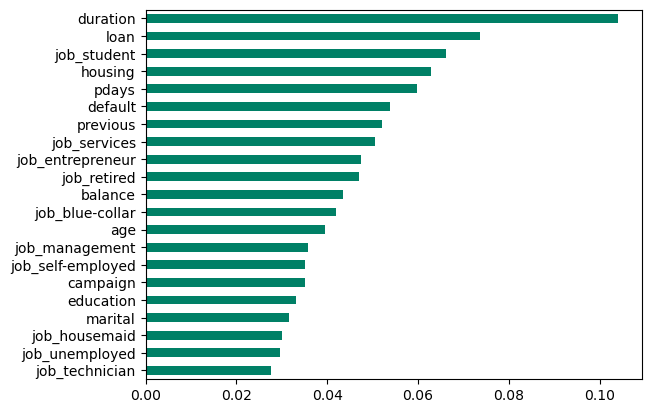

In [82]:
# Now checking the importances of the featues
s = pd.Series(xgb.feature_importances_,x_over.columns)
s.sort_values().plot(kind = "barh",cmap = "summer")

**Here we can see all the features are participating in the model**

Text(0.5, 1.0, 'ROC - AUC CURVE')

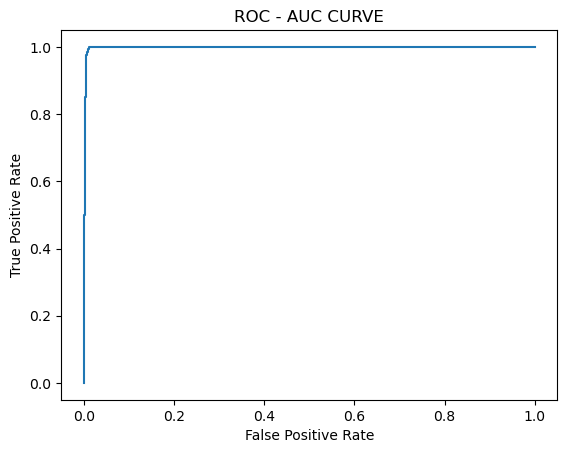

In [83]:
# Checking roc_curve
y_prob = xgb.predict_proba(x_over)
y_pr   = y_prob[:,1]
fpr,tpr,threshold = roc_curve(y_over,y_pr)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - AUC CURVE")
    

## Save the model to reuse it again

In [101]:
import pickle
# open a file, where you ant to store the data
file = open('Bank_model_xgb.pkl', 'wb')

# dump information to that file
pickle.dump(xgb, file)

# testing data

In [109]:
pr_df=pd.read_csv('test.csv')
pr_df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown
1,2,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown
2,3,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown
3,4,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown
4,5,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown


In [110]:
# making a copy of data frame
df2 = pr_df.copy()

In [111]:
# as we have seen that days and months features has same information like pdays. So I decided to drop them
df2.drop(["day","month"],axis =1, inplace = True)

In [112]:
# changing unknown with null values (because "unknown" has no information)
for i in df2.columns:
    df2[i] = np.where(df2[i] == "unknown", np.nan, df2[i])
df2.isna().sum()

Id             0
age            0
job            2
marital        0
education     40
default        0
balance        0
housing        0
loan           0
contact      427
duration       0
campaign       0
pdays          0
previous       0
poutcome     427
dtype: int64

In [113]:
df2.drop("poutcome", inplace = True, axis = 1)
df2.drop("contact", inplace = True, axis = 1)

In [114]:
df2["education"].replace({'primary':0, 'secondary':1, 'tertiary':2},inplace = True)
df2["default"].replace({'no':0, 'yes':1},inplace = True)
df2["marital"].replace({'single':0, 'married':1, 'divorced':2},inplace = True)
df2["housing"].replace({'no':0, 'yes':1},inplace = True)
df2["loan"].replace({'no':0, 'yes':1},inplace = True)

In [115]:
df2.head()

,Id,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous
0,1.0,35.0,management,1,2.0,0,231.0,1,0,139.0,1.0,-1.0,0.0
1,2.0,28.0,management,0,2.0,0,447.0,1,1,217.0,1.0,-1.0,0.0
2,3.0,42.0,entrepreneur,2,2.0,1,2.0,1,0,380.0,1.0,-1.0,0.0
3,4.0,58.0,retired,1,0.0,0,121.0,1,0,50.0,1.0,-1.0,0.0
4,5.0,43.0,technician,0,1.0,0,593.0,1,0,55.0,1.0,-1.0,0.0


In [116]:
test_id=df2[['Id']]

In [117]:
df2.drop('Id',inplace = True, axis = 1,)

In [118]:
df2=pd.get_dummies(data=df2,columns=['job'],drop_first=True)

In [119]:
df2.head(2)

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,35.0,1,2.0,0,231.0,1,0,139.0,1.0,-1.0,0.0,0,0,0,1,0,0,0,0,0,0
1,28.0,0,2.0,0,447.0,1,1,217.0,1.0,-1.0,0.0,0,0,0,1,0,0,0,0,0,0


In [120]:
# calling xgb model
model = open('Bank_model_xgb.pkl','rb')
xgb = pickle.load(model)

In [121]:
y_prediction = xgb.predict(df2)

In [122]:
y_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [126]:
y=pd.DataFrame(y_prediction)

In [127]:
prediction=pd.concat([test_id,y],axis=1)

In [128]:
prediction.rename(columns = {0:'y'}, inplace = True)

In [129]:
prediction

,Id,y
0,1.0,0
1,2.0,0
2,3.0,0
3,4.0,0
4,5.0,0
...,...,...
422,423.0,1
423,424.0,1
424,425.0,1
425,426.0,0


In [130]:
prediction.to_excel('prediction.xlsx',index=False)